# Convolutional Neural Networks (CNNs)

### Welcome to the 5th Lab of 42028: Deep Learning and CNN!

In this  Lab/Tutorial session you will be implementing Convolutional Neural Network for Fashion MNIST dataset classification .

So lets get started!

## Tutorial:
Implementation of a sample CNN architecture using Keras for classfication of Fashion MNIST dataset.

## Tasks for this week:

1. Implementation of Neural Network for Dogs and Cats classification using Keras API. 
2. Train and test model


### Step 1: Import required packages

we will need tensorflow, numpy, os and keras


In [1]:
import tensorflow as tf
import os
import numpy as np
import math, numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import h5py
import glob
import cv2
from keras.preprocessing import image


Using TensorFlow backend.


### Step 2: Download the Fashion Mnist dataset using keras

In [0]:
fashionMnist=tf.keras.datasets.fashion_mnist

In [3]:
# Load data from fashion mnist dataset using the load_data() method.
(train_images, train_labels), (test_images, test_labels) = fashionMnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
# Display the shapes of the training images
print(train_images.shape)
print(train_images.dtype)

(60000, 28, 28)
uint8


In [0]:
#define the class names for the fashion mnist dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

3


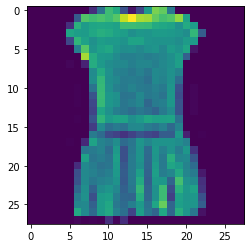

In [6]:
## Display an image from the dataset
import matplotlib.pyplot as plt
plt.imshow(train_images[3])
print(train_labels[3])

** Note :** Scikit-learn import the Fashion MNIST dataset as a 1-D array while Keras API load the dataset in 28X28 format.

### Step 3: Normalize the dataset and split a small part of the training set into validation set


- Validation set: first 5000 samples (total 5000 samples) 
- Training set: 5000 to remaining (total 55000 samples)

In [0]:
## WRITE YOUR CODE HERE ## (~ 5 line of code)
## Hint: Using slicing to split the training to train and validation

train_images=train_images.reshape(60000, 28, 28, 1)
train_images  = train_images[5000:] / 255.0
train_labels=train_labels[5000:]

valid_images= train_images[:5000] / 255.0
valid_labels = train_labels[:5000]

test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

### END YOUR CODE HERE ###

In [8]:
# Print the shapes for Train, Validation, and Test dataset.
print(np.shape(train_images))
print(np.shape(valid_images))
print(np.shape(test_images))

(55000, 28, 28, 1)
(5000, 28, 28, 1)
(10000, 28, 28, 1)


[**Expected** Output]

(55000, 28, 28)
(5000, 28, 28)
(10000, 28, 28)

### Step 4:  Design the CNN Architecture

Design the following CNN architecture:

<img src='http://drive.google.com/uc?export=view&id=1KBmj460idGx6mWbAKsH1bsEYmjpthdPB' alt='Conv'>


Input: $64 X 64 X 3$ image

Activation function in CONV layer: Relu

Activation function in Output layer : softmax, 10 classes

**Hint:** Use Conv2D(), MaxPooling2D(), Flatten(), and Dense()



In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

## **Notes:**
* **Sequential model.** This is the simplest kind of Keras model, for neural networks which defines a SEQUENCE of layers.

* **Flatten.** Flatten just takes that image and turns it into a 1-dimensional vector.

* Next we add a second Dense hidden layer with 128 neurons, also using the ReLU activation function.  **Dense.** Add a layer to the neural network which is followed by activation function of ReLU. The ReLU only passes the value greater than 0 and for all other values of X it passes 0.
e.g. If X>0 return X, else return 0"

* Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function.

* ** Softmax** The softmax takes a set of values and select the biggest one from the set of values.

## Step 5: Training the model

**"sparse_categorical_crossentropy": **   The dataset contains sparse labels and the classes are exclusive.

** One-hot vector encoding** This is sometime used for encoding the labels if there one target  probability per class for each instance. For example.
[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.] represent one-hot encoding for class 4. In such case, **"categorical_crossentropy"** loss is used.

** "sigmoid_crossentropy"** This loss is used for binary class classification problems and also **"sigmoid"** activation function is used instead of Softmax.



In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(train_images, train_labels, epochs=5)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [11]:
# Process the test images and find the accuracy
test_loss = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2662 - accuracy: 0.9037


### Summary of the model

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## Step 6: Evaluation on test dataset

In [13]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2662 - accuracy: 0.9037


[0.266166627407074, 0.9036999940872192]

## Task: Image classification using Cats and Dogs Dataset.

###  Step: 1 Mount the Google Drive to access the Cats and Dogs Dataset
Reference: https://github.com/ardamavi/Dog-Cat-Classifier



In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [20]:
cd /content/gdrive/My Drive/42028-DL-CNN-2020/Week4-Lab4/Cats-Dogs-dataset-64

/content/gdrive/My Drive/42028-DL-CNN-2020/Week4-Lab4/Cats-Dogs-dataset-64


In [21]:
!ls

TestData  TrainData


### Step : 2 Image Generators: (Preparing the dataset for train, validation and testing)

In Keras  **keras.preprocessing.image.ImageDataGenerator** class  can be used to read images and extract labels from them via .flow_from_directory. The image generator can also be used for data augmentation. The image generators can used easily with Keras model that accept data generators as inputs. such as fit_generator, evaluate_generator, and predict_generator.


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/My Drive/42028-DL-CNN-2020/Week4-Lab4/Cats-Dogs-dataset-64/',  # This is the source directory for training images
        target_size=(64, 64),  # All images will be resized to 64X64
        batch_size=30,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 32 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/gdrive/My Drive/42028-DL-CNN-2020/Week4-Lab4/Cats-Dogs-dataset-64',  # This is the source directory for training images
        target_size=(64, 64),  # All images will be resized to 64X64
        batch_size=30,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 600 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


### Step 3: Create the CNN model:

Create the following CNN model:

<img src='http://drive.google.com/uc?export=view&id=1EAWFwp7T92q3Lm1ZrX9A2-wnvhfAfzSF' alt='Conv'>

Input: $64 X 64 X 3$ image

Activation function in CONV layer: Relu

Activation function in Output layer : sigmoid, 2 classes

**Hint:** Use Conv2D(), MaxPooling2D(), Flatten(), and Dense()

In [0]:
## WRITE YOUR CODE HERE ## (~11 lines)
model1 = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

## END YOUR CODE HERE ##

In [24]:
##Print the model summary
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)         

In [0]:
## Compile the model and add loss, optimizer and metrics 
## WRITE YOUR CODE HERE ## (~1 line)
model1.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['acc'])



In [29]:
# Train/fit the model using the training and validation set.
## WRITE YOUR CODE HERE ## (~ 1 line)
history = model1.fit_generator(
      train_generator,
      steps_per_epoch=20,  
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=20)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
20/20 [==============================] - 325s 16s/step - loss: 0.4944 - acc: 0.8000 - val_loss: 0.4572 - val_acc: 0.8333
Epoch 2/10
20/20 [==============================] - 2s 82ms/step - loss: 0.4714 - acc: 0.8333 - val_loss: 0.4593 - val_acc: 0.8350
Epoch 3/10
20/20 [==============================] - 2s 83ms/step - loss: 0.4551 - acc: 0.8333 - val_loss: 0.4728 - val_acc: 0.8283
Epoch 4/10
20/20 [==============================] - 2s 87ms/step - loss: 0.4521 - acc: 0.8333 - val_loss: 0.4524 - val_acc: 0.8317
Epoch 5/10
20/20 [==============================] - 2s 93ms/step - loss: 0.4553 - acc: 0.8333 - val_loss: 0.4714 - val_acc: 0.8267
Epoch 6/10
20/20 [==============================] - 2s 88ms/step - loss: 0.4525 - acc: 0.8333 - val_loss: 0.4292 - val_acc: 0.8450
Epoch 7/10
20/20 [==============================] - 2s 90ms/step - loss: 0.4638 - acc: 0.8333 - val_loss: 0.4584 - val_acc: 0.8217
Epoch 

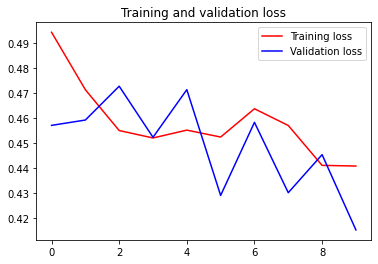

In [30]:
## Plot the Training and Validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()



### Clearing all the resources

Terminate the kernel and free memory resources

In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)